<b>Rough Code - Ignore

In [2]:
# Install the following pip packages in the current Jupyter kernel which are required while running the code.
import os
# os.system('pip install re')
# os.system('pip install json')
# os.system('pip install time')

# os.system('pip install numpy')
# os.system('pip install string')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import numpy as np
from scipy import sparse
import pandas as pd
import string
import os


In [80]:
from os import system
import os

system("pip install Squarify")
os.system('pip install pandas')
os.system('pip install csv')
os.system('pip install sklearn')
os.system('pip install nltk')

0

In [5]:
import os
os.chdir('C:\\Users\\dee jay\\Downloads\\')
data = pd.read_csv('listings (1).csv')

In [6]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
data.drop_duplicates(subset=['id'], keep='first', inplace=True)
#data.drop_duplicates(['id'], keep='first', inplace=True)
#data=data.groupby(['id'], as_index=False).median()

### Merging Sentiment Score of Reviews

In [8]:
### Merging Sentiment Score of Reviews
sentiment_score= pd.read_csv("sentiment_Values_reviews_Boston.csv")

sentiment_score=sentiment_score[["listing_id","compound"]]

sentiment_score=sentiment_score.groupby("listing_id").describe()['compound']
sentiment_score['list_id']=sentiment_score.index
merged_data= data.merge(sentiment_score, left_on="id", right_on="list_id", how="inner")
merged_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,count,mean,std,min,25%,50%,75%,max,list_id
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.365241,-71.029361,Entire home/apt,125,...,122,14.0,0.853186,0.147272,0.5578,0.795300,0.91640,0.961700,0.9894,3781
1,5506,**$79 Special ** Private! Minutes to center!,8229,Terry,NaN,Roxbury,42.329809,-71.095595,Entire home/apt,145,...,341,80.0,0.848556,0.204950,0.0000,0.826225,0.92390,0.963325,0.9954,5506
2,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.329941,-71.093505,Entire home/apt,169,...,250,85.0,0.844660,0.287649,-0.7906,0.862200,0.93690,0.960700,0.9958,6695
3,6976,Mexican Folk Art Haven in Boston Residential Area,16701,Phil,NaN,Roslindale,42.292438,-71.135765,Private room,65,...,99,75.0,0.891957,0.179225,0.0000,0.882550,0.94760,0.972950,0.9971,6976
4,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Downtown,42.359187,-71.062651,Entire home/apt,99,...,254,22.0,0.821064,0.252569,0.0000,0.806225,0.93915,0.973950,0.9815,8789


In [9]:
merged_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'list_id'],
      dtype='object')

In [10]:
merged_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 4908
Data columns (total 25 columns):
id                                4909 non-null int64
name                              4908 non-null object
host_id                           4909 non-null int64
host_name                         4907 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     4909 non-null object
latitude                          4909 non-null float64
longitude                         4909 non-null float64
room_type                         4909 non-null object
price                             4909 non-null int64
minimum_nights                    4909 non-null int64
number_of_reviews                 4909 non-null int64
last_review                       4909 non-null object
reviews_per_month                 4909 non-null float64
calculated_host_listings_count    4909 non-null int64
availability_365                  4909 non-null int64
count              

In [11]:
merged_data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,count,mean,std,min,25%,50%,75%,max,list_id
count,4.909000e+03,4.909000e+03,0.0,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4428.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4.909000e+03
mean,1.758390e+07,5.514521e+07,NaN,42.338727,-71.083545,195.280709,4.138114,40.604604,1.977268,33.003463,139.104502,40.587085,0.737111,0.294473,-0.040722,0.683375,0.828823,0.892564,0.937999,1.758390e+07
std,8.663872e+06,6.164111e+07,NaN,0.026348,0.032919,386.593158,12.825139,60.864355,2.100735,76.112669,125.723805,60.847177,0.194226,0.154959,0.604467,0.251296,0.201571,0.181046,0.176961,8.663872e+06
min,3.781000e+03,4.804000e+03,NaN,42.235760,-71.173506,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.000000,-0.972600,0.000000,-0.997500,-0.972600,-0.972600,-0.972600,-0.972600,3.781000e+03
25%,1.112239e+07,1.127229e+07,NaN,42.324697,-71.103925,80.000000,1.000000,4.000000,0.380000,1.000000,17.000000,4.000000,0.682950,0.193447,-0.591300,0.621525,0.819850,0.906775,0.963300,1.112239e+07
50%,1.912188e+07,2.784203e+07,NaN,42.345001,-71.076505,145.000000,2.000000,17.000000,1.190000,3.000000,100.000000,17.000000,0.774466,0.291503,0.000000,0.751150,0.885950,0.943000,0.984900,1.912188e+07
75%,2.430029e+07,8.252916e+07,NaN,42.355371,-71.061390,200.000000,3.000000,52.000000,3.000000,16.000000,253.000000,52.000000,0.849142,0.379170,0.475400,0.850975,0.928800,0.962300,0.992700,2.430029e+07
max,3.216361e+07,2.398503e+08,NaN,42.392119,-70.995948,5000.000000,300.000000,626.000000,13.710000,306.000000,365.000000,626.000000,0.993700,1.327876,0.993700,0.993700,0.993700,0.997150,0.999400,3.216361e+07


In [12]:
merged_data=merged_data[merged_data['price']<1000]

In [13]:
import seaborn as sns
# sns.boxplot(X['images'])
import matplotlib.pyplot as plt
# sns.JointGrid(X,X)

C:\Users\dee Jay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\dee Jay\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\dee Jay\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\dee Jay\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\dee Jay\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dee Jay\Anaconda3\lib\site-packages\statsmodels\nonpara

ZeroDivisionError: 0.0 cannot be raised to a negative power

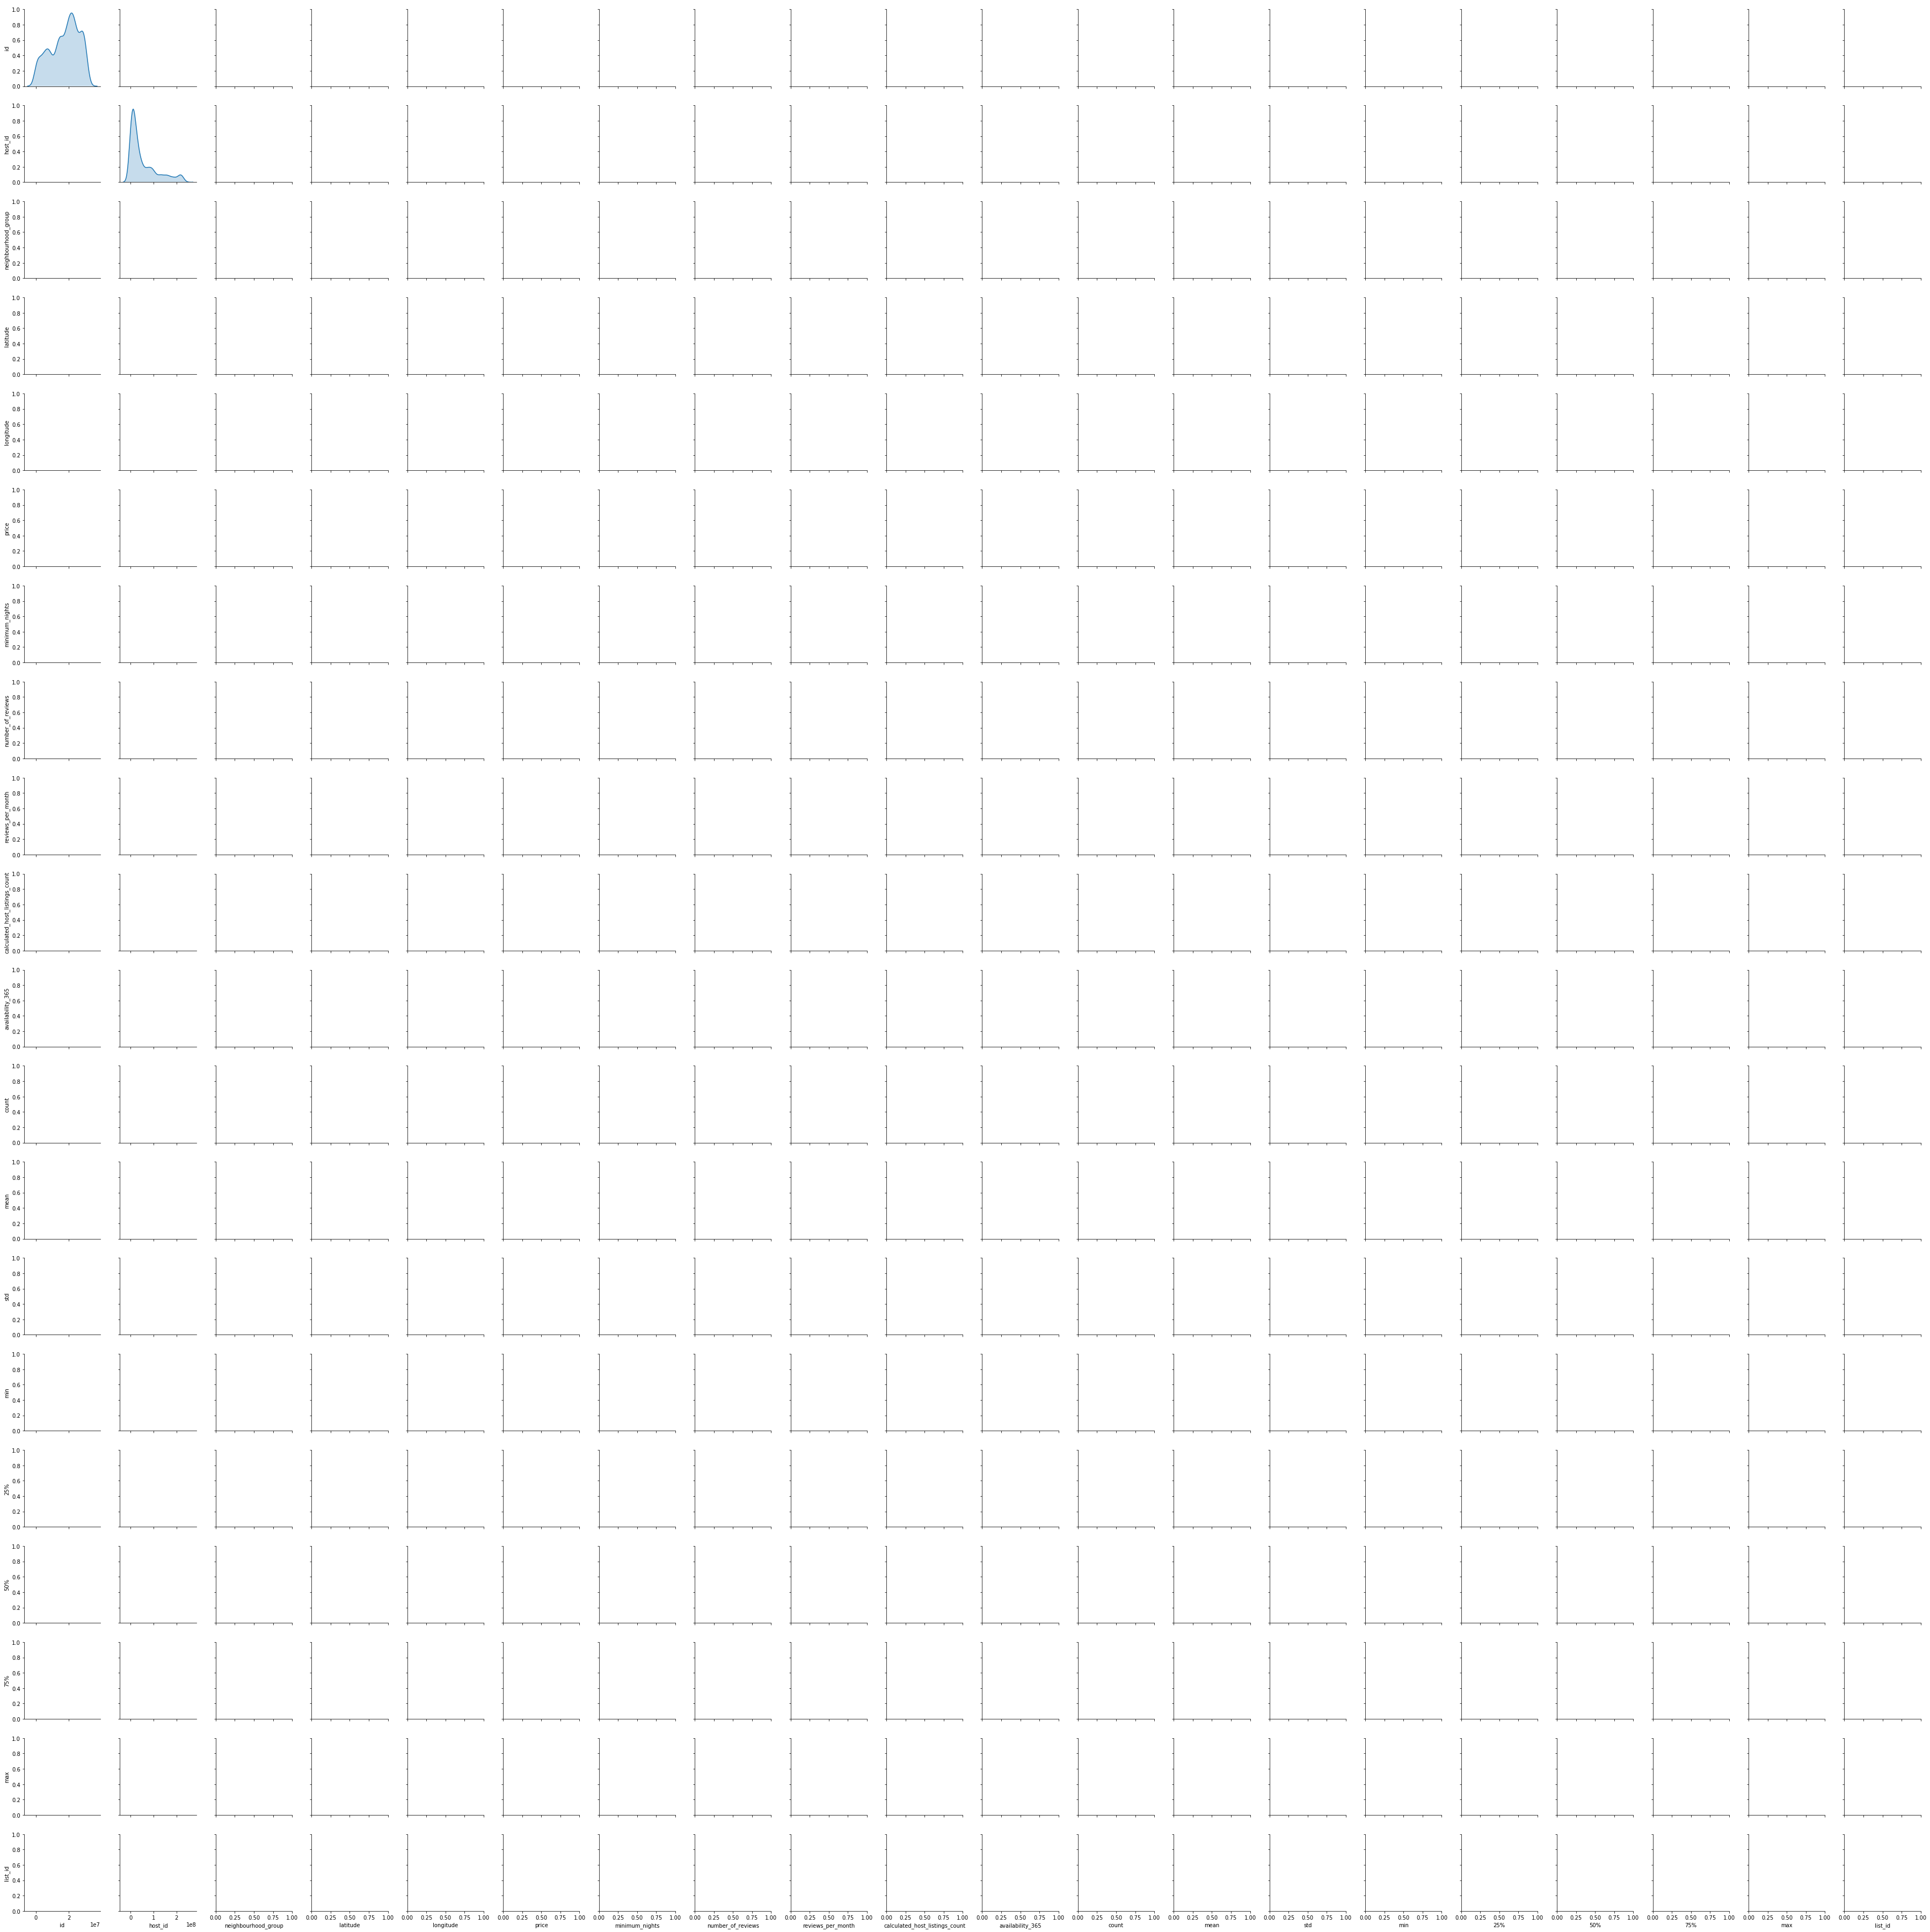

In [14]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
#df = sns.load_dataset('iris')
 
# Density
sns.pairplot(merged_data, diag_kind="kde")
 
# Histogram
sns.pairplot(merged_data, diag_kind="hist")
 
# You can custom it as a density plot or histogram so see the related sections
sns.pairplot(merged_data, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )


Text(0, 0.5, 'Group')

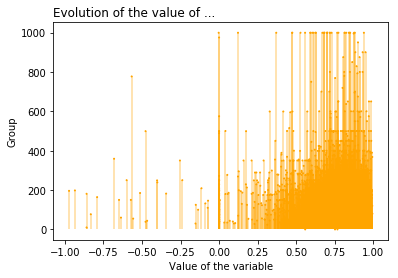

In [16]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# Data
y = merged_data['price']
x = merged_data['mean']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'orange', 'skyblue')
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
# Add title and axis names
plt.title("Evolution of the value of ...", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')


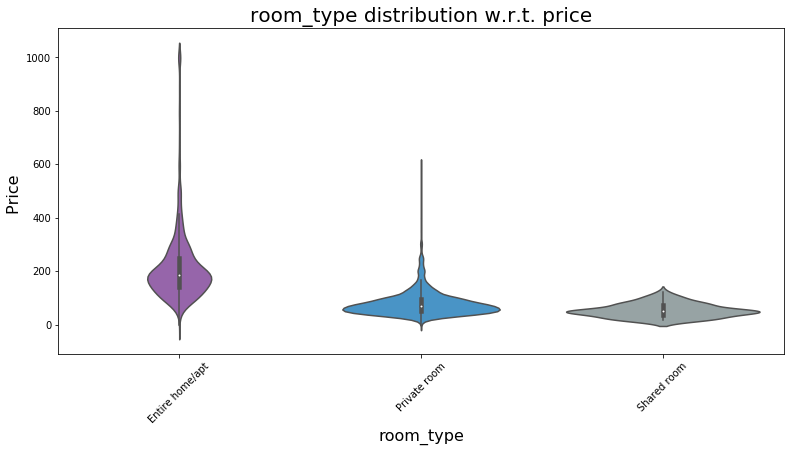

In [17]:
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui) 
plt.figure(figsize=(13,6)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.violinplot(x='room_type', y='price', 
                   data=merged_data[(merged_data['room_type'].isin((merged_data['room_type'].value_counts()[:10].index.values))) &
                                  merged_data['room_type'] > 0 ])
g1.set_title('room_type distribution w.r.t. price', fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('room_type', fontsize=16) # Xlabel
g1.set_ylabel('Price ', fontsize=16) #Ylabel

plt.show()

In [ ]:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'list_id']

### Missing Values 

In [26]:
cat_col=['host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type',  'last_review'       ]
num_col=[]
for col in merged_data.columns:
    if col not in cat_col:
        num_col.append(col)

In [29]:
cat_col=['id', 'name', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type',  'last_review' ,'list_id'  ]
num_col=[]
for col in merged_data.columns:
    if col not in cat_col:
        num_col.append(col)

In [30]:
for col in num_col:
     merged_data[col].fillna(merged_data[col].median(),inplace=True)

### Outliers Removal

In [31]:
for col in num_col:
      merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)
      merged_data[col]=[float(i) for i in merged_data[col]]
      mean, std=np.mean(merged_data[col]),np.std(merged_data[col])
      within=[mean-2*std,mean+2*std]
      ndata=merged_data[merged_data[col].isin(within)]

In [32]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(data['number_of_reviews']))
print(z)
b=np.where(z > 2)
print(b)

[0.32398776 0.83908707 0.9271988  ... 0.5707006  0.5707006  0.5707006 ]
(array([  24,   31,   37,   38,   45,   57,   63,   64,   69,   73,   81,
         82,   83,   84,   86,   87,   88,   91,   95,   97,   98,  100,
        107,  110,  115,  118,  121,  123,  130,  136,  143,  145,  147,
        151,  157,  160,  164,  167,  173,  181,  182,  183,  184,  185,
        186,  189,  191,  192,  202,  208,  209,  210,  217,  220,  222,
        223,  224,  225,  234,  238,  243,  247,  249,  250,  259,  261,
        273,  274,  279,  289,  293,  297,  310,  313,  321,  344,  347,
        348,  351,  355,  359,  371,  373,  380,  383,  388,  393,  402,
        410,  412,  414,  420,  423,  424,  433,  451,  452,  453,  454,
        458,  467,  468,  477,  480,  482,  488,  495,  513,  531,  532,
        536,  540,  544,  567,  575,  580,  582,  583,  588,  590,  591,
        592,  593,  600,  601,  612,  613,  625,  657,  672,  680,  686,
        699,  702,  715,  720,  724,  727,  733,  7

In [33]:
Q1 = data['number_of_reviews'].quantile(0.25)
Q3 = data['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
data[(data['number_of_reviews'] < (Q1 - 1.5 * IQR)) | (data['number_of_reviews'] > (Q3 + 1.5 * IQR))].head(10)\


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24,22354,COPLEY SQ...19TH C.TWNHSE SUNNY RM,85770,Robert,NaN,South End,42.344957,-71.074857,Private room,148,2,293,2018-11-16,3.20,5,90
31,27546,L'Auberge Espagnole /room H,119019,Hermina,NaN,Dorchester,42.298349,-71.059104,Private room,55,1,234,2018-09-01,2.20,10,354
37,31796,Big room with two bed/Room A,119019,Hermina,NaN,Dorchester,42.299773,-71.060476,Private room,43,1,412,2018-12-30,3.91,10,352
38,36885,A Cozy Corner of Boston,159160,Deborah,NaN,Fenway,42.346335,-71.088323,Entire home/apt,165,4,150,2018-10-17,1.44,1,0
44,45987,Gorgeous Garden Studio Charlestown,205107,Atef,NaN,Charlestown,42.374043,-71.061177,Entire home/apt,100,3,110,2018-11-17,1.07,1,348
45,47521,Beautiful Victorian House /C,119019,Hermina,NaN,Dorchester,42.297720,-71.059240,Private room,50,1,327,2019-01-20,3.19,10,334
55,60029,Room in geographical heart of Hub,255183,Michelle,NaN,Roxbury,42.325842,-71.089269,Private room,75,2,131,2018-12-01,1.33,5,223
57,66288,Architects Live-in Studio in Boston,324630,Sean,NaN,Mission Hill,42.332152,-71.106742,Entire home/apt,79,1,626,2019-01-22,6.37,1,34
61,69369,Room in Boston off the beaten path,255183,Michelle,NaN,Roxbury,42.326142,-71.088404,Private room,85,1,105,2018-11-11,1.12,5,303
63,77691,Beautiful Victorian House /Room B,119019,Hermina,NaN,Dorchester,42.297709,-71.059791,Private room,65,1,277,2019-01-05,2.87,10,361


### Encoding Categorical variables

In [34]:
cat_col=['neighbourhood_group','neighbourhood', 'room_type'   ]
# Label Encoding our target variable 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
l=LabelEncoder() 


 
 

 

#One Hot Encoding of the Categorical features 
one_hot_neighbourhood_group=pd.get_dummies(merged_data.neighbourhood_group) 
one_hot_neighbourhood=pd.get_dummies(merged_data.neighbourhood) 
one_hot_room_type=pd.get_dummies(merged_data.room_type) 


#removing categorical features 
merged_data.drop(['neighbourhood_group','neighbourhood', 'room_type' ],axis=1,inplace=True) 

 

#Merging one hot encoded features with our dataset 'data' 
merged_data=pd.concat([merged_data,one_hot_neighbourhood_group,one_hot_neighbourhood,one_hot_room_type],axis=1) 

#removing dulpicate columns 
_, i = np.unique(merged_data.columns, return_index=True) 
merged_data=merged_data.iloc[:, i] 

#Here our target variable is 'Income' with values as 1 or 0.  
#Separating our data into features dataset x and our target dataset y 


### Addressing multi- colinearity

In [35]:
# Create correlation matrix
corr_matrix = merged_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

x=merged_data.drop(to_drop,axis=1,inplace=True) 

### Data Partioning 

In [36]:
x=merged_data.drop(['price','host_id','id','last_review','name','host_name',],axis=1) 
y=merged_data.price 

 

#Imputing missing values in our target variable 
y.fillna(y.mode()[0],inplace=True) 

#Now splitting our dataset into test and train 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
for col in x.columns:
    x[col]

## Modeling, Feature Selection, Evaluation

### Linear Regression

In [37]:
#linear regression  ---------------
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

#making prediction 
y_ptrain = lm.predict(x_train)
y_pred = lm.predict(x_test)


  #linear regression metrics------
from sklearn import metrics
#print(lm.summary)
print('Linear Regression Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Linear Regression Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Linear Regression Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('Linear Regression Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))

Linear Regression Mean Absolute Error: 64.39523591624868
Linear Regression Mean Squared Error: 10784.460614600377
Linear Regression Root Mean Squared Error for train: 0.6528789453670013
Linear Regression Root Mean Squared Error for test: 0.6253163525766526


### Random Forest

In [38]:
#random forest ---------------

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train, y_train) 
y_ptrain=regressor.predict(x_train) 
y_pred = regressor.predict(x_test)  

#random forest metrics----------
from sklearn import metrics
print('Random Forest Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Random Forest Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Random Forest Mean Squared Error for train set:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('Random Forest Mean Squared Error for test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))

Random Forest Mean Absolute Error: 56.39543121149897
Random Forest Mean Squared Error: 8758.856814681725
Random Forest Mean Squared Error for train set: 0.2175432099270665
Random Forest Mean Squared Error for test set: 0.5635393997285499


### XGBoost Regressor

In [39]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train, y_train) 
y_ptrain=regressor.predict(x_train) 
y_pred = regressor.predict(x_test)  

#random forest metrics----------
from sklearn import metrics
print('XGBRegressor Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('XGBRegressor Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('XGBRegressor Mean Squared Error for train set:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('XGBRegressor Mean Squared Error for test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))

XGBRegressor Mean Absolute Error: 56.00993182673836
XGBRegressor Mean Squared Error: 9929.509126594328
XGBRegressor Mean Squared Error for train set: 0.6230632574719136
XGBRegressor Mean Squared Error for test set: 0.6000182518561371


C:\Users\dee Jay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


### MLP Regressor

In [40]:
#Neural Network ---------------
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor()
MLP.fit(x_train,y_train)

#making prediction 
y_ptrain = MLP.predict(x_train)
y_pred = MLP.predict(x_test)


  #Neural Network metrics------
from sklearn import metrics

print('Neural Network Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Neural Network Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Neural Network Root Mean Squared Error for train:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('Neural Network Root Mean Squared Error for test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))

Neural Network Mean Absolute Error: 61.88596206449033
Neural Network Mean Squared Error: 10121.227961231458
Neural Network Root Mean Squared Error for train: 0.6190292573250952
Neural Network Root Mean Squared Error for test: 0.6057831301954493


C:\Users\dee Jay\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Feature Selection

C:\Users\dee Jay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


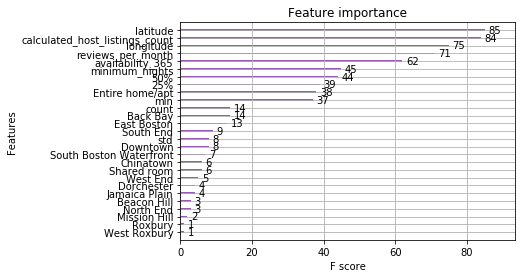

In [41]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
model = XGBRegressor()
model.fit(x_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()


In [42]:
# select features using threshold
thresh=0.02
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(x_train)
# train model
selection_model = XGBRegressor()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(x_test)
y_pred = selection_model.predict(select_X_test)
# select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(x_train)
# train model
selection_model = XGBRegressor()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_ptrain = selection.transform(x_train)
y_ptrain = selection_model.predict(select_X_ptrain)
select_X_test = selection.transform(x_test)
y_pred = selection_model.predict(select_X_test)
print('XGBoost Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('XGBoost Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('XGBoost Root Mean Squared Error for train set:', np.sqrt(metrics.mean_squared_error(y_train, y_ptrain))/np.mean(y_train))
print('XGBoost Root Mean Squared Error for test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/np.mean(y_train))


C:\Users\dee Jay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\dee Jay\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBoost Mean Absolute Error: 56.418854991513356
XGBoost Mean Squared Error: 8234.325320477323
XGBoost Root Mean Squared Error for train set: 0.4978588394288577
XGBoost Root Mean Squared Error for test set: 0.5464048960473034
